# Varcelona? Vardrid? or simply delusion?

Problem:
This project investigates whether the referee assigned to a match has a significant effect on the win/loss outcomes for two major soccer teams: FC Barcelona and Real Madrid.
Questions:

Do certain referees correlate with higher win rates for Barcelona or Real Madrid?
Is there evidence of referee bias or patterns in match results?

in this notebook I will be analyzing whether the assigned referee has a significant effect on the wins/losses of the soccer teams Barcelona and real madrid. 


The dataset is from Kaggle.
https://www.kaggle.com/datasets/tarekmasryo/football-matches-20242025-top-5-leagues

Description:
It contains match-level data for the 2024–2025 season, including:

home_team, away_team: Teams playing
fulltime_home, fulltime_away: Final scores
referee: Referee assigned
match_outcome, home_points, away_points: Result and points
Other features: Date, stadium, etc.

In [13]:
import pandas as pd
df = pd.read_csv("C:\\Users\\muham\\Downloads\\archive\\football_matches_2024_2025.csv")

Here I'm cleaning the dataset to specifically be Barcelona and Real Madrid games. The current dataset contains the match data for every game played and as we are just looking at Barcelona and Real Madrid we can filter it to these two teams in specific.

In [14]:
brGames = df[(df['home_team'].isin(["FC Barcelona", "Real Madrid CF"])) | (df['away_team'].isin(["FC Barcelona", "Real Madrid CF"]))]


In [15]:
brGames

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local_africa_cairo
385,PD,La Liga,2024/2025,498617,1,REGULAR_SEASON,FINISHED,2024-08-17 19:30:00+00:00,José Sánchez Martínez,95,...,1,2,1.0,1.0,-1,3,Away Win,0,3,2024-08-17 22:30
387,PD,La Liga,2024/2025,498619,1,REGULAR_SEASON,FINISHED,2024-08-18 19:30:00+00:00,César Soto Grado,89,...,1,1,0.0,1.0,0,2,Draw,1,1,2024-08-18 22:30
393,PD,La Liga,2024/2025,498628,2,REGULAR_SEASON,FINISHED,2024-08-24 17:00:00+00:00,Jesús Gil Manzano,81,...,2,1,1.0,1.0,1,3,Home Win,3,0,2024-08-24 20:00
396,PD,La Liga,2024/2025,498631,2,REGULAR_SEASON,FINISHED,2024-08-25 15:00:00+00:00,Víctor García Verdura,86,...,3,0,0.0,0.0,3,3,Home Win,3,0,2024-08-25 18:00
402,PD,La Liga,2024/2025,498637,3,REGULAR_SEASON,FINISHED,2024-08-27 19:30:00+00:00,César Soto Grado,87,...,1,2,1.0,0.0,-1,3,Away Win,0,3,2024-08-27 22:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,CL,UEFA Champions League,2024/2025,523936,6,LEAGUE_STAGE,FINISHED,2024-12-11 20:00:00+00:00,François Letexier,4,...,2,3,0.0,0.0,-1,5,Away Win,0,3,2024-12-11 22:00
1909,CL,UEFA Champions League,2024/2025,523984,7,LEAGUE_STAGE,FINISHED,2025-01-21 20:00:00+00:00,Danny Makkelie,1903,...,4,5,3.0,1.0,-1,9,Away Win,0,3,2025-01-21 22:00
1917,CL,UEFA Champions League,2024/2025,523966,7,LEAGUE_STAGE,FINISHED,2025-01-22 20:00:00+00:00,Glenn Nyberg,86,...,5,1,2.0,0.0,4,6,Home Win,3,0,2025-01-22 22:00
1925,CL,UEFA Champions League,2024/2025,523941,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Michael Oliver,81,...,2,2,0.0,0.0,0,4,Draw,1,1,2025-01-29 22:00


Now I'll make a function that checks if each game was a win a draw or a loss as currently there is no column displaying wins and losses simply scores of each team. Also there must be a parameter for the team so I can check either team. (both barcelona and madrid)

In [16]:
def get_team_result(row, team):
    if row['home_team'] == team:
        if row['fulltime_home'] > row['fulltime_away']:
            return "Win"
        elif row['fulltime_home'] < row['fulltime_away']:
            return "Loss"
        else:
            return "Draw"
    elif row['away_team'] == team:
        if row['fulltime_away'] > row['fulltime_home']:
            return "Win"
        elif row['fulltime_away'] < row['fulltime_home']:
            return "Loss"
        else:
            return "Draw"
    else:
        return None

Now I'll use that function on the set of Barca and Madrid games to add a new column that clearly tells me if they won or lost

In [17]:
brGames['barcelona_result'] = brGames.apply(lambda row: get_team_result(row, "FC Barcelona"), axis=1)
brGames['madrid_result'] = brGames.apply(lambda row: get_team_result(row, "Real Madrid CF"), axis=1)

C:\Users\muham\AppData\Local\Temp\ipykernel_30836\3769202808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brGames['barcelona_result'] = brGames.apply(lambda row: get_team_result(row, "FC Barcelona"), axis=1)
C:\Users\muham\AppData\Local\Temp\ipykernel_30836\3769202808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brGames['madrid_result'] = brGames.apply(lambda row: get_team_result(row, "Real Madrid CF"), axis=1)


In [18]:
brGames

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local_africa_cairo,barcelona_result,madrid_result
385,PD,La Liga,2024/2025,498617,1,REGULAR_SEASON,FINISHED,2024-08-17 19:30:00+00:00,José Sánchez Martínez,95,...,1.0,1.0,-1,3,Away Win,0,3,2024-08-17 22:30,Win,None
387,PD,La Liga,2024/2025,498619,1,REGULAR_SEASON,FINISHED,2024-08-18 19:30:00+00:00,César Soto Grado,89,...,0.0,1.0,0,2,Draw,1,1,2024-08-18 22:30,None,Draw
393,PD,La Liga,2024/2025,498628,2,REGULAR_SEASON,FINISHED,2024-08-24 17:00:00+00:00,Jesús Gil Manzano,81,...,1.0,1.0,1,3,Home Win,3,0,2024-08-24 20:00,Win,None
396,PD,La Liga,2024/2025,498631,2,REGULAR_SEASON,FINISHED,2024-08-25 15:00:00+00:00,Víctor García Verdura,86,...,0.0,0.0,3,3,Home Win,3,0,2024-08-25 18:00,None,Win
402,PD,La Liga,2024/2025,498637,3,REGULAR_SEASON,FINISHED,2024-08-27 19:30:00+00:00,César Soto Grado,87,...,1.0,0.0,-1,3,Away Win,0,3,2024-08-27 22:30,Win,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,CL,UEFA Champions League,2024/2025,523936,6,LEAGUE_STAGE,FINISHED,2024-12-11 20:00:00+00:00,François Letexier,4,...,0.0,0.0,-1,5,Away Win,0,3,2024-12-11 22:00,Win,None
1909,CL,UEFA Champions League,2024/2025,523984,7,LEAGUE_STAGE,FINISHED,2025-01-21 20:00:00+00:00,Danny Makkelie,1903,...,3.0,1.0,-1,9,Away Win,0,3,2025-01-21 22:00,Win,None
1917,CL,UEFA Champions League,2024/2025,523966,7,LEAGUE_STAGE,FINISHED,2025-01-22 20:00:00+00:00,Glenn Nyberg,86,...,2.0,0.0,4,6,Home Win,3,0,2025-01-22 22:00,None,Win
1925,CL,UEFA Champions League,2024/2025,523941,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Michael Oliver,81,...,0.0,0.0,0,4,Draw,1,1,2025-01-29 22:00,Draw,None


Now I will group barcas game results by the referee that officiated them

In [19]:
# Group by referee for Barcelona
barca_ref = brGames[brGames['barcelona_result'].notnull()].groupby(['referee', 'barcelona_result']).size().unstack(fill_value=0)
barca_ref['Total'] = barca_ref.sum(axis=1)
barca_ref['Win %'] = (barca_ref['Win'] / barca_ref['Total']) * 100



In [20]:
barca_ref

barcelona_result,Draw,Loss,Win,Total,Win %
referee,,,,,
Adrián Cordero Vega,0,1,1,2,50.000000
Alejandro Hernández Hernández,0,0,2,2,100.000000
Alejandro Muñiz Ruiz,1,0,2,3,66.666667
Alejandro Quintero González,0,1,1,2,50.000000
Allard Lindhout,0,1,0,1,0.000000
Clément Turpin,1,0,0,1,0.000000
César Soto Grado,1,0,3,4,75.000000
Danny Makkelie,0,0,1,1,100.000000
Erik Lambrechts,0,0,1,1,100.000000


In [21]:

# Group by referee for Real Madrid
madrid_ref = brGames[brGames['madrid_result'].notnull()].groupby(['referee', 'madrid_result']).size().unstack(fill_value=0)
madrid_ref['Total'] = madrid_ref.sum(axis=1)
madrid_ref['Win %'] = (madrid_ref['Win'] / madrid_ref['Total']) * 100

In [22]:
# Display top referees by number of matches
print("Barcelona results by referee:")
print(barca_ref.sort_values('Total', ascending=False).head(10))
print("\nReal Madrid results by referee:")
print(madrid_ref.sort_values('Total', ascending=False).head(10))

Barcelona results by referee:
barcelona_result        Draw  Loss  Win  Total       Win %
referee                                                   
César Soto Grado           1     0    3      4   75.000000
Alejandro Muñiz Ruiz       1     0    2      3   66.666667
Pablo González Fuertes     1     0    2      3   66.666667
José Munuera Montero       0     1    2      3   66.666667
Jesús Gil Manzano          1     0    2      3   66.666667
Ricardo de Burgos          0     1    2      3   66.666667
Espen Eskås                0     0    2      2  100.000000
Mateo Busquets Ferrer      0     0    2      2  100.000000
Mario Melero López         0     0    2      2  100.000000
François Letexier          0     0    2      2  100.000000

Real Madrid results by referee:
madrid_result                  Draw  Loss  Win  Total       Win %
referee                                                          
Alejandro Hernández Hernández     0     2    2      4   50.000000
Mateo Busquets Ferrer          

Now here are some nice visualizations that can give some clarity as to what these numbers mean and how you can understand them as it applies to the fairness of referees of the barca-madrid matches.

we have two bar charts that displays the win rate based on the referee officiating.
I also have a function to limit it to the first initial of the word  

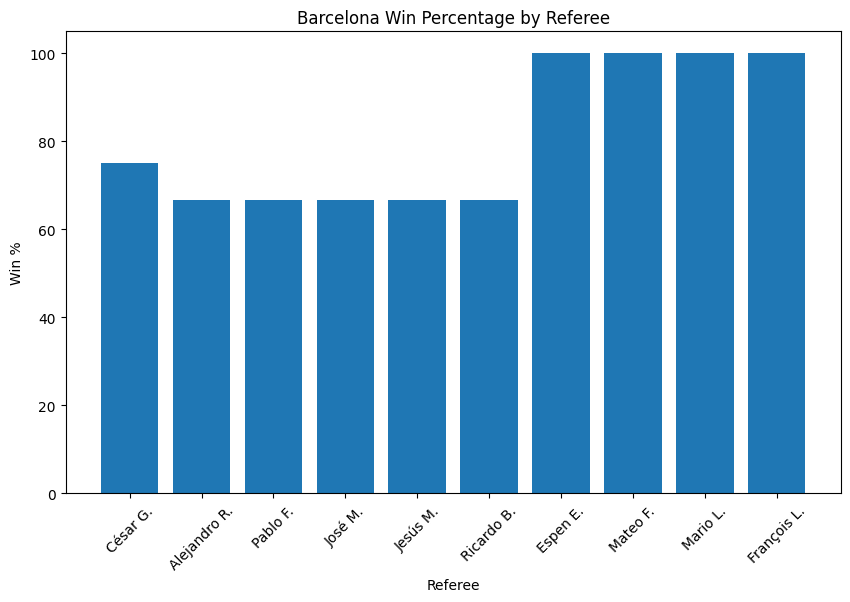

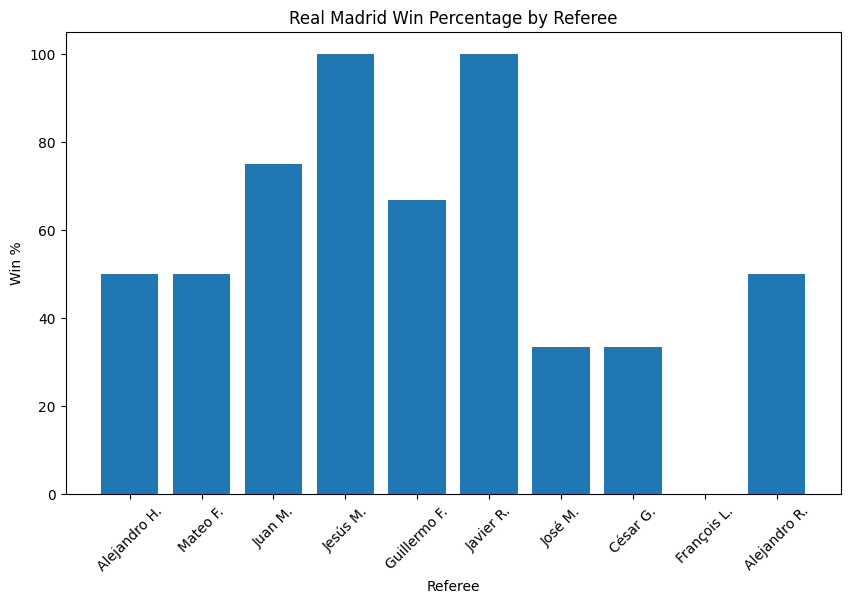

In [28]:
import matplotlib.pyplot as plt

def last_initial(name):
    parts = name.split()
    if len(parts) > 1:
        return parts[0] + " " + parts[-1][0] + "."
    else:
        return name

# Bar chart for Barcelona win % by referee
barca_ref_sorted = barca_ref.sort_values('Total', ascending=False).head(10)
barca_ref_sorted.index = [last_initial(name) for name in barca_ref_sorted.index]
plt.figure(figsize=(10,6))
plt.bar(barca_ref_sorted.index, barca_ref_sorted['Win %'])
plt.title('Barcelona Win Percentage by Referee')
plt.xlabel('Referee')
plt.ylabel('Win %')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Real Madrid win % by referee
madrid_ref_sorted = madrid_ref.sort_values('Total', ascending=False).head(10)
madrid_ref_sorted.index = [last_initial(name) for name in madrid_ref_sorted.index]
plt.figure(figsize=(10,6))
plt.bar(madrid_ref_sorted.index, madrid_ref_sorted['Win %'])
plt.title('Real Madrid Win Percentage by Referee')
plt.xlabel('Referee')
plt.ylabel('Win %')
plt.xticks(rotation=45, ha='center') 
plt.show()

In [24]:
print(len(df))
print(df.columns)
print(len(df.columns))

1941
Index(['competition_code', 'competition_name', 'season', 'match_id',
       'matchday', 'stage', 'status', 'date_utc', 'referee', 'home_team_id',
       'home_team', 'away_team_id', 'away_team', 'fulltime_home',
       'fulltime_away', 'halftime_home', 'halftime_away', 'goal_difference',
       'total_goals', 'match_outcome', 'home_points', 'away_points',
       'date_local_africa_cairo'],
      dtype='object')
23


## Storytelling
The analysis shows how win percentages for Barcelona and Real Madrid vary by referee. For example, some referees are associated with higher win rates for one team, which could suggest patterns worth further investigation. These visualizations help answer the initial question about referee influence and may reveal unexpected trends or outliers. I believe that the current data is not enough and I would have to join it with further data of multiple seasons to get a better understanding for now it would be dishonest to determine anything based off the small amount of data points currently allotted by the dataset. So I have not gotten a sufficient answer to my question I'll have to rework this in the future. Possibly for the final submission!

## Impact Section
This project could impact perceptions of fairness in football and also on the legitimacy of what was done . Visualizations might be misinterpreted as evidence of bias without deeper statistical analysis. Missing data, such as referee assignment processes or team strength, could affect conclusions. Ethical concerns include the risk of unfairly accusing referees of bias based on incomplete data.

## References
- [Kaggle Football Matches Dataset](https://www.kaggle.com/)
- Python pandas documentation
- matplotlib documentation
- Chatgpt for storytelling and impact and some direction in the code
